<!DOCTYPE html>
<html>
<head>
<title>
</title>
<meta name="viewport" content="width=device-width, initial-scale=1">
</head>
<body>
<h1 style="color:DodgerBlue;">
1 IMPORTING LIBRARIES</h1>
</body>
</html>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

<!DOCTYPE html>
<html>
<head>
<title>
</title>
<meta name="viewport" content="width=device-width, initial-scale=1">
</head>
<body>
<h1 style="color:DodgerBlue;">
2 Data Import & Preprocessing</h1>
</body>
</html>

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
# train data info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# test data info
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
# let us check missing value for train data
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# let us check missing value for test data
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">
<html style = "font-family:Calibri, Arial, Helvetica, sans-serif; font-size:11pt; background-color:white ">
  <head>
      <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
      <meta name="generator" content="PhpSpreadsheet, https://github.com/PHPOffice/PhpSpreadsheet">
      <meta name="author" content="Raj Dalsaniya" />
    <style type="text/css">
      a.comment-indicator:hover + div.comment { background:#ffd; position:absolute; display:block; border:1px solid black; padding:0.5em }
      a.comment-indicator { background:red; display:inline-block; border:1px solid black; width:0.5em; height:0.5em }
      div.comment { display:none }
      table { border-collapse:collapse; page-break-after:always }
      .gridlines td { border:1px dotted black }
      .gridlines th { border:1px dotted black }
      .b { text-align:center }
      .e { text-align:center }
      .f { text-align:right }
      .inlineStr { text-align:left }
      .n { text-align:right }
      .s { text-align:left }
      td.style0 { vertical-align:bottom; border-bottom:none #000000; border-top:none #000000; border-left:none #000000; border-right:none #000000; color:#000000; font-family:'Calibri'; font-size:11pt; background-color:white }
      th.style0 { vertical-align:bottom; border-bottom:none #000000; border-top:none #000000; border-left:none #000000; border-right:none #000000; color:#000000; font-family:'Calibri'; font-size:11pt; background-color:white }
      td.style1 { vertical-align:middle; text-align:center; border-bottom:none #000000; border-top:none #000000; border-left:none #000000; border-right:none #000000; color:#000000; font-family:'Calibri'; font-size:11pt; background-color:white }
      th.style1 { vertical-align:middle; text-align:center; border-bottom:none #000000; border-top:none #000000; border-left:none #000000; border-right:none #000000; color:#000000; font-family:'Calibri'; font-size:11pt; background-color:white }
      td.style2 { vertical-align:bottom; text-align:center; border-bottom:1px solid #000000 !important; border-top:1px solid #000000 !important; border-left:1px solid #000000 !important; border-right:1px solid #000000 !important; color:#000000; font-family:'Calibri'; font-size:11pt; background-color:white }
      th.style2 { vertical-align:bottom; text-align:center; border-bottom:1px solid #000000 !important; border-top:1px solid #000000 !important; border-left:1px solid #000000 !important; border-right:1px solid #000000 !important; color:#000000; font-family:'Calibri'; font-size:11pt; background-color:white }
      td.style3 { vertical-align:middle; text-align:center; border-bottom:1px solid #000000 !important; border-top:1px solid #000000 !important; border-left:1px solid #000000 !important; border-right:1px solid #000000 !important; color:#000000; font-family:'Var(--jp-code-font-family)'; font-size:10pt; background-color:white }
      th.style3 { vertical-align:middle; text-align:center; border-bottom:1px solid #000000 !important; border-top:1px solid #000000 !important; border-left:1px solid #000000 !important; border-right:1px solid #000000 !important; color:#000000; font-family:'Var(--jp-code-font-family)'; font-size:10pt; background-color:white }
      td.style4 { vertical-align:middle; text-align:center; border-bottom:1px solid #000000 !important; border-top:1px solid #000000 !important; border-left:1px solid #000000 !important; border-right:1px solid #000000 !important; color:#000000; font-family:'Calibri'; font-size:11pt; background-color:white }
      th.style4 { vertical-align:middle; text-align:center; border-bottom:1px solid #000000 !important; border-top:1px solid #000000 !important; border-left:1px solid #000000 !important; border-right:1px solid #000000 !important; color:#000000; font-family:'Calibri'; font-size:11pt; background-color:white }
      td.style5 { vertical-align:middle; text-align:center; border-bottom:1px solid #000000 !important; border-top:1px solid #000000 !important; border-left:1px solid #000000 !important; border-right:1px solid #000000 !important; color:#000000; font-family:'Calibri'; font-size:11pt; background-color:#FFFF00 }
      th.style5 { vertical-align:middle; text-align:center; border-bottom:1px solid #000000 !important; border-top:1px solid #000000 !important; border-left:1px solid #000000 !important; border-right:1px solid #000000 !important; color:#000000; font-family:'Calibri'; font-size:11pt; background-color:#FFFF00 }
      td.style6 { vertical-align:middle; text-align:center; border-bottom:1px solid #000000 !important; border-top:1px solid #000000 !important; border-left:1px solid #000000 !important; border-right:1px solid #000000 !important; color:#000000; font-family:'Calibri'; font-size:11pt; background-color:#4472C4 }
      th.style6 { vertical-align:middle; text-align:center; border-bottom:1px solid #000000 !important; border-top:1px solid #000000 !important; border-left:1px solid #000000 !important; border-right:1px solid #000000 !important; color:#000000; font-family:'Calibri'; font-size:11pt; background-color:#4472C4 }
      td.style7 { vertical-align:middle; text-align:center; border-bottom:none #000000; border-top:none #000000; border-left:none #000000; border-right:none #000000; color:#000000; font-family:'Calibri'; font-size:11pt; background-color:#FFFFFF }
      th.style7 { vertical-align:middle; text-align:center; border-bottom:none #000000; border-top:none #000000; border-left:none #000000; border-right:none #000000; color:#000000; font-family:'Calibri'; font-size:11pt; background-color:#FFFFFF }
      td.style8 { vertical-align:middle; text-align:center; border-bottom:none #000000; border-top:none #000000; border-left:none #000000; border-right:none #000000; color:#000000; font-family:'Var(--jp-code-font-family)'; font-size:10pt; background-color:#FFFFFF }
      th.style8 { vertical-align:middle; text-align:center; border-bottom:none #000000; border-top:none #000000; border-left:none #000000; border-right:none #000000; color:#000000; font-family:'Var(--jp-code-font-family)'; font-size:10pt; background-color:#FFFFFF }
      table.sheet0 col.col0 { width:91.49999895pt }
      table.sheet0 col.col1 { width:91.49999895pt }
      table.sheet0 col.col2 { width:91.49999895pt }
      table.sheet0 col.col3 { width:26.43333303pt }
      table.sheet0 col.col4 { width:42pt }
      table.sheet0 col.col5 { width:42pt }
      table.sheet0 col.col6 { width:42pt }
      table.sheet0 tr { height:15pt }
    </style>
  </head>

  <body>
<style>
@page { margin-left: 0.7in; margin-right: 0.7in; margin-top: 0.75in; margin-bottom: 0.75in; }
body { margin-left: 0.7in; margin-right: 0.7in; margin-top: 0.75in; margin-bottom: 0.75in; }
</style>
    <table border="0" cellpadding="0" cellspacing="0" id="sheet0" class="sheet0 gridlines">
        <col class="col0">
        <col class="col1">
        <col class="col2">
        <col class="col3">
        <col class="col4">
        <col class="col5">
        <col class="col6">
        <tbody>
          <tr class="row0">
            <td class="column0 style5 s style5" colspan="3">TRAIN DATA</td>
            <td class="column3 style7 null"></td>
            <td class="column4 style5 s style5" colspan="3">TEST DATA</td>
          </tr>
          <tr class="row1">
            <td class="column0 style6 s">Column</td>
            <td class="column1 style6 s">Missing Row Count</td>
            <td class="column2 style6 s">Dtype</td>
            <td class="column3 style7 null"></td>
            <td class="column4 style6 s">Column</td>
            <td class="column5 style6 s">Missing Row Count</td>
            <td class="column6 style6 s">Dtype</td>
          </tr>
          <tr class="row2">
            <td class="column0 style3 s">PassengerId      </td>
            <td class="column1 style4 n">0</td>
            <td class="column2 style3 s">int64  </td>
            <td class="column3 style8 null"></td>
            <td class="column4 style3 s">PassengerId      </td>
            <td class="column5 style2 n">0</td>
            <td class="column6 style3 s">int64  </td>
          </tr>
          <tr class="row3">
            <td class="column0 style3 s">Survived         </td>
            <td class="column1 style4 n">0</td>
            <td class="column2 style3 s">int64  </td>
            <td class="column3 style8 null"></td>
            <td class="column4 style3 s">Survived         </td>
            <td class="column5 style2 n">0</td>
            <td class="column6 style3 s">int64  </td>
          </tr>
          <tr class="row4">
            <td class="column0 style3 s">Pclass           </td>
            <td class="column1 style4 n">0</td>
            <td class="column2 style3 s">int64  </td>
            <td class="column3 style8 null"></td>
            <td class="column4 style3 s">Pclass           </td>
            <td class="column5 style2 n">0</td>
            <td class="column6 style3 s">int64  </td>
          </tr>
          <tr class="row5">
            <td class="column0 style3 s">Name             </td>
            <td class="column1 style4 n">0</td>
            <td class="column2 style4 s">object</td>
            <td class="column3 style7 null"></td>
            <td class="column4 style3 s">Name             </td>
            <td class="column5 style2 n">0</td>
            <td class="column6 style4 s">object</td>
          </tr>
          <tr class="row6">
            <td class="column0 style3 s">Sex              </td>
            <td class="column1 style4 n">0</td>
            <td class="column2 style4 s">object</td>
            <td class="column3 style7 null"></td>
            <td class="column4 style3 s">Sex              </td>
            <td class="column5 style2 n">0</td>
            <td class="column6 style4 s">object</td>
          </tr>
          <tr class="row7">
            <td class="column0 style3 s">Age            </td>
            <td class="column1 style4 n">177</td>
            <td class="column2 style3 s">float64</td>
            <td class="column3 style8 null"></td>
            <td class="column4 style3 s">Age            </td>
            <td class="column5 style2 n">86</td>
            <td class="column6 style3 s">float64</td>
          </tr>
          <tr class="row8">
            <td class="column0 style3 s">SibSp            </td>
            <td class="column1 style4 n">0</td>
            <td class="column2 style3 s">int64  </td>
            <td class="column3 style8 null"></td>
            <td class="column4 style3 s">SibSp            </td>
            <td class="column5 style2 n">0</td>
            <td class="column6 style3 s">int64  </td>
          </tr>
          <tr class="row9">
            <td class="column0 style3 s">Parch            </td>
            <td class="column1 style4 n">0</td>
            <td class="column2 style3 s">int64  </td>
            <td class="column3 style8 null"></td>
            <td class="column4 style3 s">Parch            </td>
            <td class="column5 style2 n">0</td>
            <td class="column6 style3 s">int64  </td>
          </tr>
          <tr class="row10">
            <td class="column0 style3 s">Ticket           </td>
            <td class="column1 style4 n">0</td>
            <td class="column2 style4 s">object</td>
            <td class="column3 style7 null"></td>
            <td class="column4 style3 s">Ticket           </td>
            <td class="column5 style2 n">0</td>
            <td class="column6 style4 s">object</td>
          </tr>
          <tr class="row11">
            <td class="column0 style3 s">Fare             </td>
            <td class="column1 style4 n">0</td>
            <td class="column2 style3 s">float64</td>
            <td class="column3 style8 null"></td>
            <td class="column4 style3 s">Fare             </td>
            <td class="column5 style2 n">1</td>
            <td class="column6 style3 s">float64</td>
          </tr>
          <tr class="row12">
            <td class="column0 style3 s">Cabin          </td>
            <td class="column1 style4 n">687</td>
            <td class="column2 style4 s">object</td>
            <td class="column3 style7 null"></td>
            <td class="column4 style3 s">Cabin          </td>
            <td class="column5 style2 n">327</td>
            <td class="column6 style4 s">object</td>
          </tr>
          <tr class="row13">
            <td class="column0 style3 s">Embarked         </td>
            <td class="column1 style4 n">2</td>
            <td class="column2 style4 s">object</td>
            <td class="column3 style7 null"></td>
            <td class="column4 style3 s">Embarked         </td>
            <td class="column5 style2 n">0</td>
            <td class="column6 style4 s">object</td>
          </tr>
        </tbody>
    </table>
  </body>
</html>

In [7]:
# let see train_data correlation for Age column with other columns
train_data_corr = train_data.corr().abs().unstack().sort_values(kind = "quicksort", ascending = False).reset_index()

train_data_corr.rename(columns = {"level_0":"Feature 1","level_1":"Feature 2",0:"Correlation coefficeint"},inplace = True)
train_data_corr[train_data_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation coefficeint
5,Age,Age,1.000000
12,Age,Pclass,0.369226
16,Age,SibSp,0.308247
21,Age,Parch,0.189119
26,Age,Fare,0.096067
32,Age,Survived,0.077221
36,Age,PassengerId,0.036847


<!DOCTYPE html>
<html>
<head>
<title>
</title>
<meta name="viewport" content="width=device-width, initial-scale=1">
</head>
<body>
<h1 style="color:Red;">
Age Variable :
</h1>
<h2 style="color:DodgerBlue;">
Missing value in Age Group, we will fill using median. using whole dataset median value of Age is not good idea. since Age and Pclass is highly correlated with survival ( output variable) . so it is more good to grup age by Pclass.
</h2>
</body>
</html>

In [8]:
age_by_pclass_sex = train_data.groupby(["Pclass","Sex"]).median()["Age"]
for pclass in range(1,4):
    for sex in ["female","male"] :
        print("median value of pclass "+str(pclass)+" "+ sex+" is:"+str(age_by_pclass_sex[pclass][sex]))
print('Median age of all passengers: {}'.format(train_data['Age'].median()))

# let us impute missing age value using group of Pclass and sex
train_data["Age"] = train_data.groupby(["Pclass","Sex"])["Age"].apply(lambda x:x.fillna(x.median()))

median value of pclass 1 female is:35.0
median value of pclass 1 male is:40.0
median value of pclass 2 female is:28.0
median value of pclass 2 male is:30.0
median value of pclass 3 female is:21.5
median value of pclass 3 male is:25.0
Median age of all passengers: 28.0


In [9]:
age_by_pclass_sex_test = test_data.groupby(["Pclass","Sex"]).median()["Age"]
for pclass in range(1,4):
    for sex in ["female","male"]:
        print("median value of pclass "+str(pclass)+" "+ sex+" is:"+str(age_by_pclass_sex_test[pclass][sex]))
print('Median age of all passengers: {}'.format(test_data['Age'].median()))

# let us impute missing age value using group of Pclass and sex for test data
test_data["Age"] = test_data.groupby(["Pclass","Sex"])["Age"].apply(lambda x:x.fillna(x.median()))

median value of pclass 1 female is:41.0
median value of pclass 1 male is:42.0
median value of pclass 2 female is:24.0
median value of pclass 2 male is:28.0
median value of pclass 3 female is:22.0
median value of pclass 3 male is:24.0
Median age of all passengers: 27.0


In [10]:
train_data[train_data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
embarked_by_Sex = train_data.groupby(["Embarked","Sex"]).count()["Age"]
embarked_by_Sex

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    203
          male      441
Name: Age, dtype: int64

<!DOCTYPE html>
<html>
<head>
<title>
</title>
<meta name="viewport" content="width=device-width, initial-scale=1">
</head>
<body>
<h1 style="color:Red;">
Embarked Variable :
</h1>
<h2 style="color:DodgerBlue;">
Embarked column is categorical variable. There is 2 value missing in embarked column. since there is only 2 value missing shown above.both passenger holding same ticket number and both are female.Since Both holding same ticket we know both embarked from same port. Mode value for embarked for female is S but this is not necessarily true. let check if we find something on internet
</h2>
</body>
</html> .

<!DOCTYPE html>
<html>
<head>
<title>
</title>
<meta name="viewport" content="width=device-width, initial-scale=1">
</head>
<body>
<h3 style="color:DodgerBlue;">
When I search about Stone, Mrs. George Nelson (Martha Evelyn), on google. i found some information . you can check on this <a href=" https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html">link</a> From below image is clear that Martha Evelyn embarked from S port
</h3>
<a href="https://imgbb.com/"><img src="https://i.ibb.co/0qS1818/test-1.jpg" alt="test-1" border="0"></a><br />
</body>
</html> .


In [12]:
# let impute missing data in Embarked column with S
train_data['Embarked'] = train_data['Embarked'].fillna('S')

In [13]:
# Fare value column
test_data[test_data["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


<!DOCTYPE html>
<html>
<head>
<title>
</title>
<meta name="viewport" content="width=device-width, initial-scale=1">
</head>
<body>
<h1 style="color:Red;">
Fare column :
</h1>
<h2 style="color:DodgerBlue;">
In Fare colum only one value missing let us check which row has missing value. We assume that fare is related to family size and Pclass. as missing value sex is male , Pclass is 3 and no family(Parch and SibSp). so we can group by above feature like sex=Male; Parch = 0; SibSp= 0; Pclass = 3 and impute median value .
</h2>
</body>
</html>

In [14]:
median_fare = test_data.groupby(["Pclass","Parch","SibSp"]).Fare.median()[3][0][0]
test_data["Fare"] = test_data["Fare"] .fillna(median_fare)

<!DOCTYPE html>
<html>
<head>
<title>
</title>
<meta name="viewport" content="width=device-width, initial-scale=1">
</head>
<body>
<h1 style="color:Red;">
Cabin column :
</h1>
<h2 style="color:DodgerBlue">
Cabin Feature is Categorical value. There is lots of missing value in dataset. but as there are some cabin which have high survival rate and some has not.Let us explore more for Cabin Feature what can we do on this. Look at this blueprint of titanic.
</h2>
<a href="https://ibb.co/mvqwTpkk"><img src="https://i.ibb.co/TK8S2y6/Titanic-side-plan.webp" alt="Titanic-side-plan" border="1" width="1500" height="600"></a>
<ul style="color:DodgerBlue">
<li>On the Boat Deck there were 6 rooms labeled as T, U, W, X, Y, Z but only the T cabin is present in the dataset</li>
<li>A, B and C decks were only for 1st class passengers</li>
<li>D and E decks were for all classes</li>
<li>F and G decks were for both 2nd and 3rd class passengers</li>
<li>From going A to G, distance to the staircase increases which might be a factor of survival</li>
</ul>  
</body>
</html> 

In [15]:
# let us create new coulmn : first letter of the cabin column as deck ... for missing value as M deck (train_data)
train_data["Deck"] =  train_data['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
train_data_decks =  train_data.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()

In [16]:
# let us create new coulmn : first letter of the cabin column as deck ... for missing value as M deck (test data)
test_data["Deck"] =  test_data['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
test_data_decks =  test_data.groupby(['Deck', 'Pclass']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()

In [17]:
def get_pclass_count_per(df):
    
    # Creating a dictionary for every passenger class count in every deck
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]
    
    for deck in decks:
        for pclass in range(1,4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
    
    df_decks = pd.DataFrame(deck_counts)    
    deck_percentages = {}

    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages

In [18]:
def display_pclass_dist(percentages):
    
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)   
    
    plt.show()

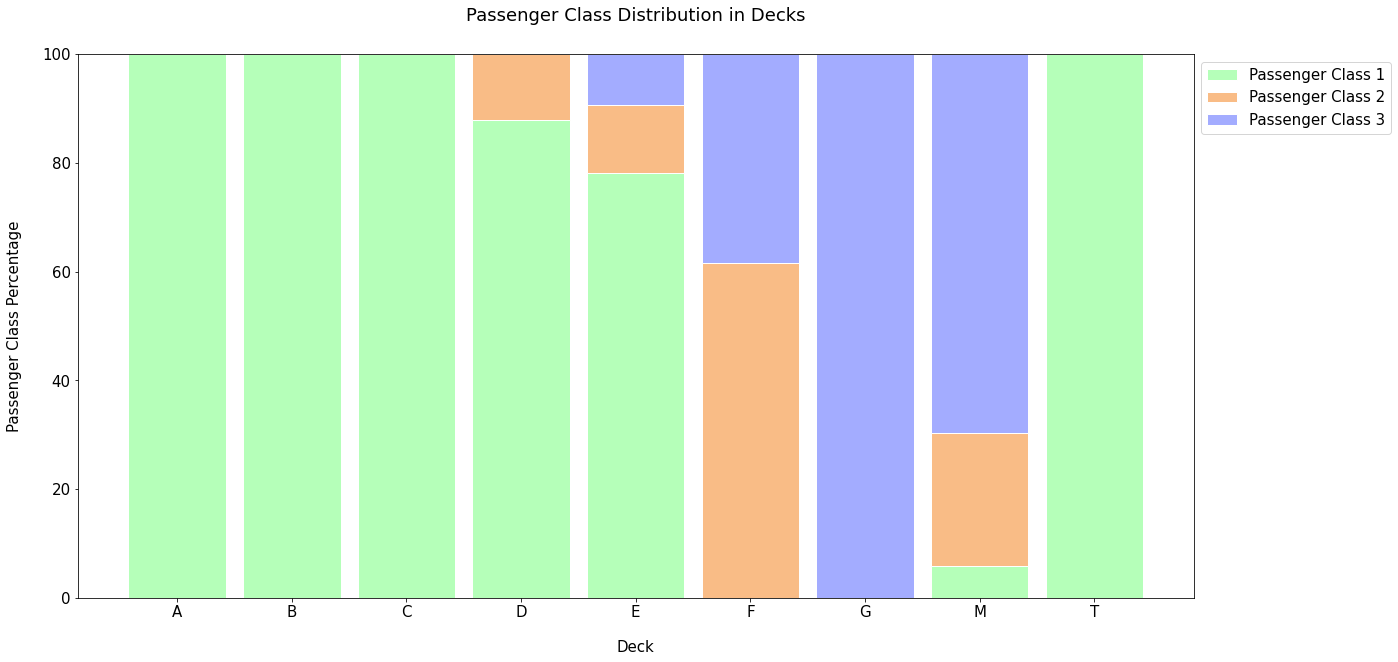

In [19]:
# let do first for train data
train_deck_count, train_deck_per = get_pclass_count_per(train_data_decks)
display_pclass_dist(train_deck_per)

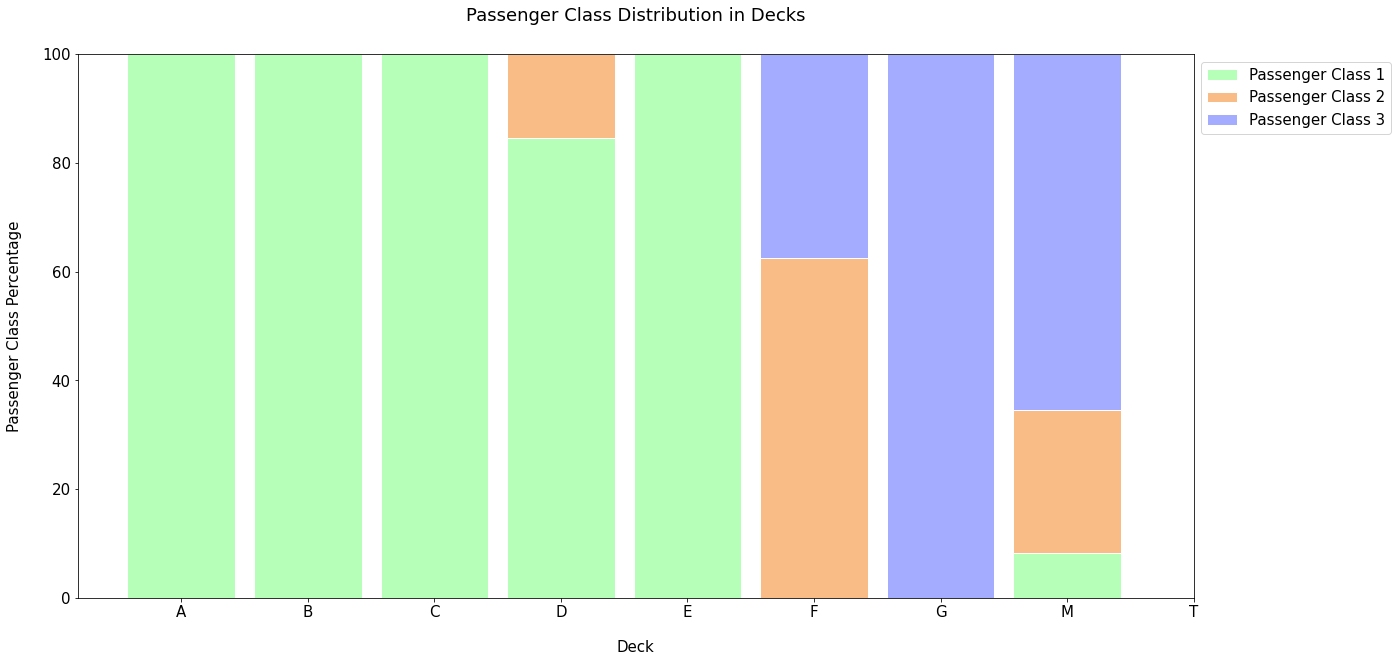

In [20]:
# let do first for test data
test_deck_count, test_deck_per = get_pclass_count_per(test_data_decks)
display_pclass_dist(test_deck_per)

<!DOCTYPE html>
<html>
<head>
<title>
</title>
<meta name="viewport" content="width=device-width, initial-scale=1">
</head>
<body>
<h1 style="color:Red;">
Intutation from Above graphs (train and test data):
</h1>
<ul style="color:DodgerBlue; list-style-type: square; padding: 10px; font-size:16px;"><ul style="color:DodgerBlue; font-size:16px;">
<li>100% Passanger from A,B,C decks are 1st class passanger</li>
<li>For D deck 87% passanger around are 1st class passanger. others are 2nd class passanger</li>
<li>For E in test data it belong to 1st class passanger. For G in test data it belong to 3rd class Passanger 100%</li>
<li>For E Deck in train data nearly 80% belong to 1st class passanger.around 10% each belong to 2nd and 3rd class passanger </li>
<li>There is one person on the boat deck in T cabin and he is a 1st class passenger. T cabin passenger has the closest resemblance to A deck passengers so he is grouped with A deck</li>
<li>Passengers labeled as M are the missing values in Cabin feature. I don't think it is possible to find those passengers' real Deck so I decided to use M like a deck</li>
<li> 100% of G deck are 3rd class passanger</li>
</ul>  
</body>
</html> 

In [21]:
# let us change passanger in T deck is changed to A (train Data)
idx = train_data[train_data['Deck'] == 'T'].index
train_data.loc[idx, 'Deck'] = 'A'

In [22]:
# let us change passanger in T deck is changed to A (test Data)
idx = test_data[test_data['Deck'] == 'T'].index
test_data.loc[idx, 'Deck'] = 'A'

In [23]:
train_data_decks_survived = train_data.groupby(['Deck', 'Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
                                                                                   'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

test_data_decks_survived = test_data.groupby(['Deck']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
                                                                                   'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

In [24]:
def get_survived_dist(df):
    
    # Creating a dictionary for every survival count in every deck
    surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]    

    for deck in decks:
        for survive in range(0, 2):
            surv_counts[deck][survive] = df[deck][survive][0]
            
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
        
    return surv_counts, surv_percentages

def display_surv_dist(percentages):
    
    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85    

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, not_survived, color='#b5ffb9', edgecolor='white', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='#f9bc86', edgecolor='white', width=bar_width, label="Survived")
 
    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Survival Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Survival Percentage in Decks', size=18, y=1.05)
    
    plt.show()

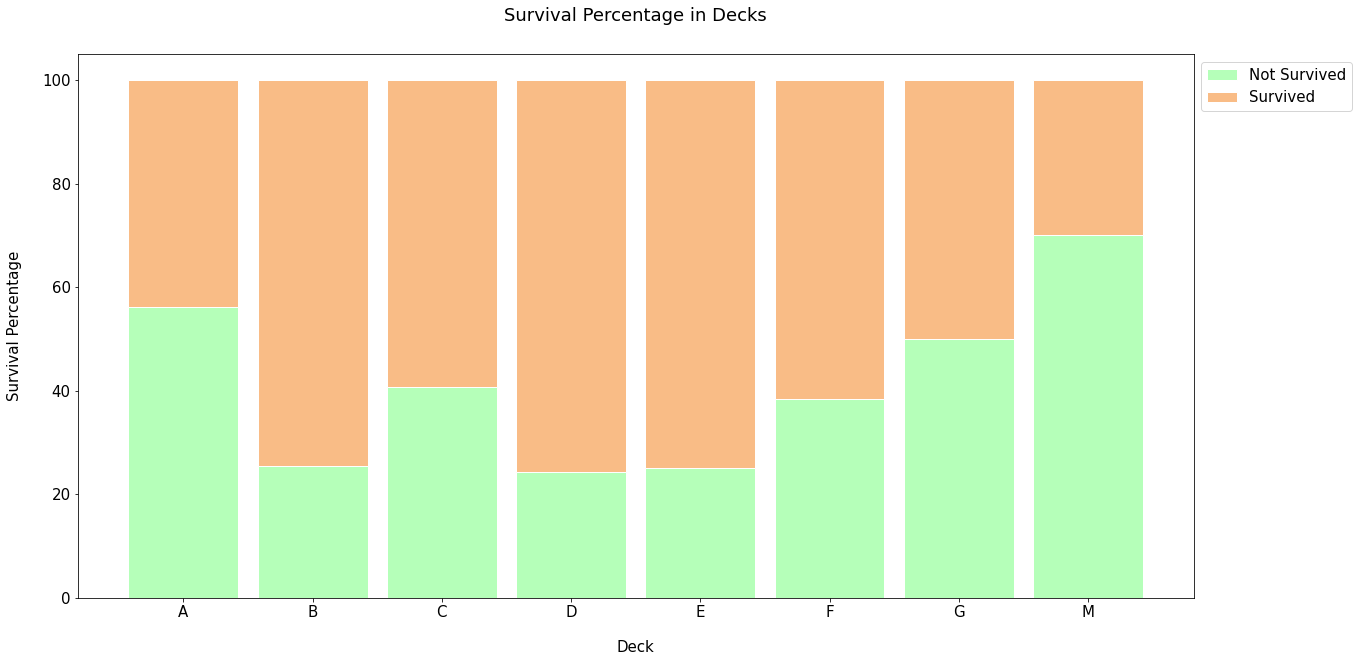

In [25]:
train_surv_count, train_surv_per = get_survived_dist(train_data_decks_survived)
display_surv_dist(train_surv_per)

In [26]:
# since ABC Deck is all First class Citizen let change deck as ABC
train_data['Deck'] = train_data['Deck'].replace(['A', 'B', 'C'], 'ABC')
test_data['Deck'] = test_data['Deck'].replace(['A', 'B', 'C'], 'ABC')

In [27]:
# D and E decks are labeled as DE because both of them have similar passenger class distribution and same survival rate
train_data['Deck'] = train_data['Deck'].replace(['D', 'E'], 'DE')
test_data['Deck'] = test_data['Deck'].replace(['D', 'E'], 'DE')

In [28]:
# F and G decks are labeled as DE because both of them have similar passenger class distribution and same survival rate
train_data['Deck'] = train_data['Deck'].replace(['F', 'G'], 'FG')
test_data['Deck'] = test_data['Deck'].replace(['F', 'G'], 'FG')

In [29]:
# let check value counts for deck column in train data
train_data["Deck"].value_counts()

M      687
ABC    122
DE      65
FG      17
Name: Deck, dtype: int64

In [30]:
# let check value counts for deck column in test data
test_data["Deck"].value_counts()

M      327
ABC     60
DE      22
FG       9
Name: Deck, dtype: int64

In [31]:
# we extract Deck feature from Cabin feature so we will drop cabin column
train_data.drop(['Cabin'], inplace=True, axis=1)
test_data.drop(['Cabin'], inplace=True, axis=1)

In [32]:
# let check null value in train data
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Deck           0
dtype: int64

In [33]:
# let check null value in test data
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Deck           0
dtype: int64

<!DOCTYPE html>
<html>
<head>
<title>
</title>
<meta name="viewport" content="width=device-width, initial-scale=1">
</head>
<body>
<h1 style="color:DodgerBlue;">
3 Feature Engineering</h1>
<ul style="color:DodgerBlue; list-style-type: square; padding: 10px; font-size:16px;">
    <li>Family size : We will count total no of family member avilable in Family </li>
    <li>IsAlone : this will indicate he/she was travelling along or not </li>
    <li>FareBin : Bins range for Fare</li>
    <li>AgeBin : Bins range for Age variable</li>
    <li> Title : Title from name</li>
    <li>Ticket_Frequency: occurence of Ticket values</li>
    <li>Is_Married : this will categorical feature which indicate it is married or not</li>
    <li>Family : this feature is created with the extracted surname.</li>
</ul>
</body>
</html>

In [34]:
## feature engineering for creaing new features for train and test data

data_cleaner = [train_data, test_data]
for dataset in data_cleaner:
    
    # discreate variable Family Size
    dataset["FamilySize"] = dataset['SibSp'] + dataset['Parch'] + 1
    
    #for ISAlone feature 
    dataset["IsAlone"] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1
    
    #Fare Bins : using qcut
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4) # creating 4 bins
    
    #Age Bins : using qcut
    dataset["AgeBin"] = pd.qcut(dataset['Age'].astype(int), 5) # creating 5 bins
    
    # Title : we will use split method
    dataset["Title"] = dataset["Name"].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    
    #cleanup rare title names
    stat_min = 10
    
    title_names = (dataset['Title'].value_counts() < stat_min)
    
    #apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
    dataset['Title'] = dataset['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


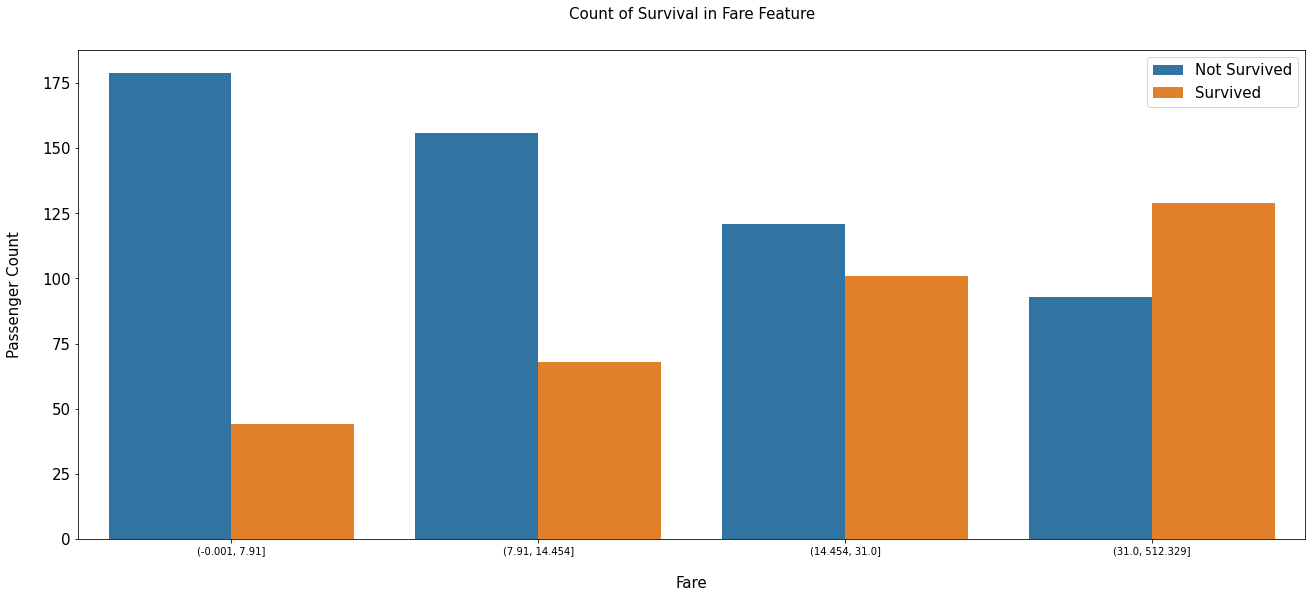

In [35]:
# train data Survival vs Fare bins
fig,axis = plt.subplots(figsize = (22,9))
sns.countplot(x='FareBin', hue='Survived', data=train_data)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()


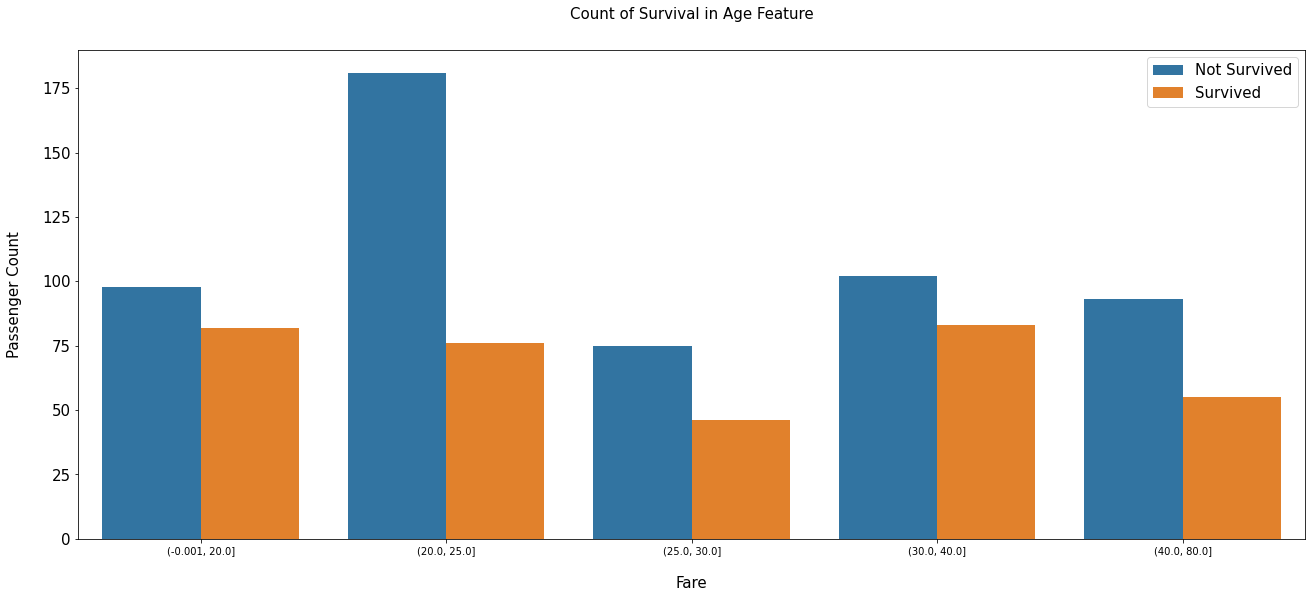

In [36]:
# train data Survival vs Fare bins
fig,axis = plt.subplots(figsize = (22,9))
sns.countplot(x='AgeBin', hue='Survived', data=train_data)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()


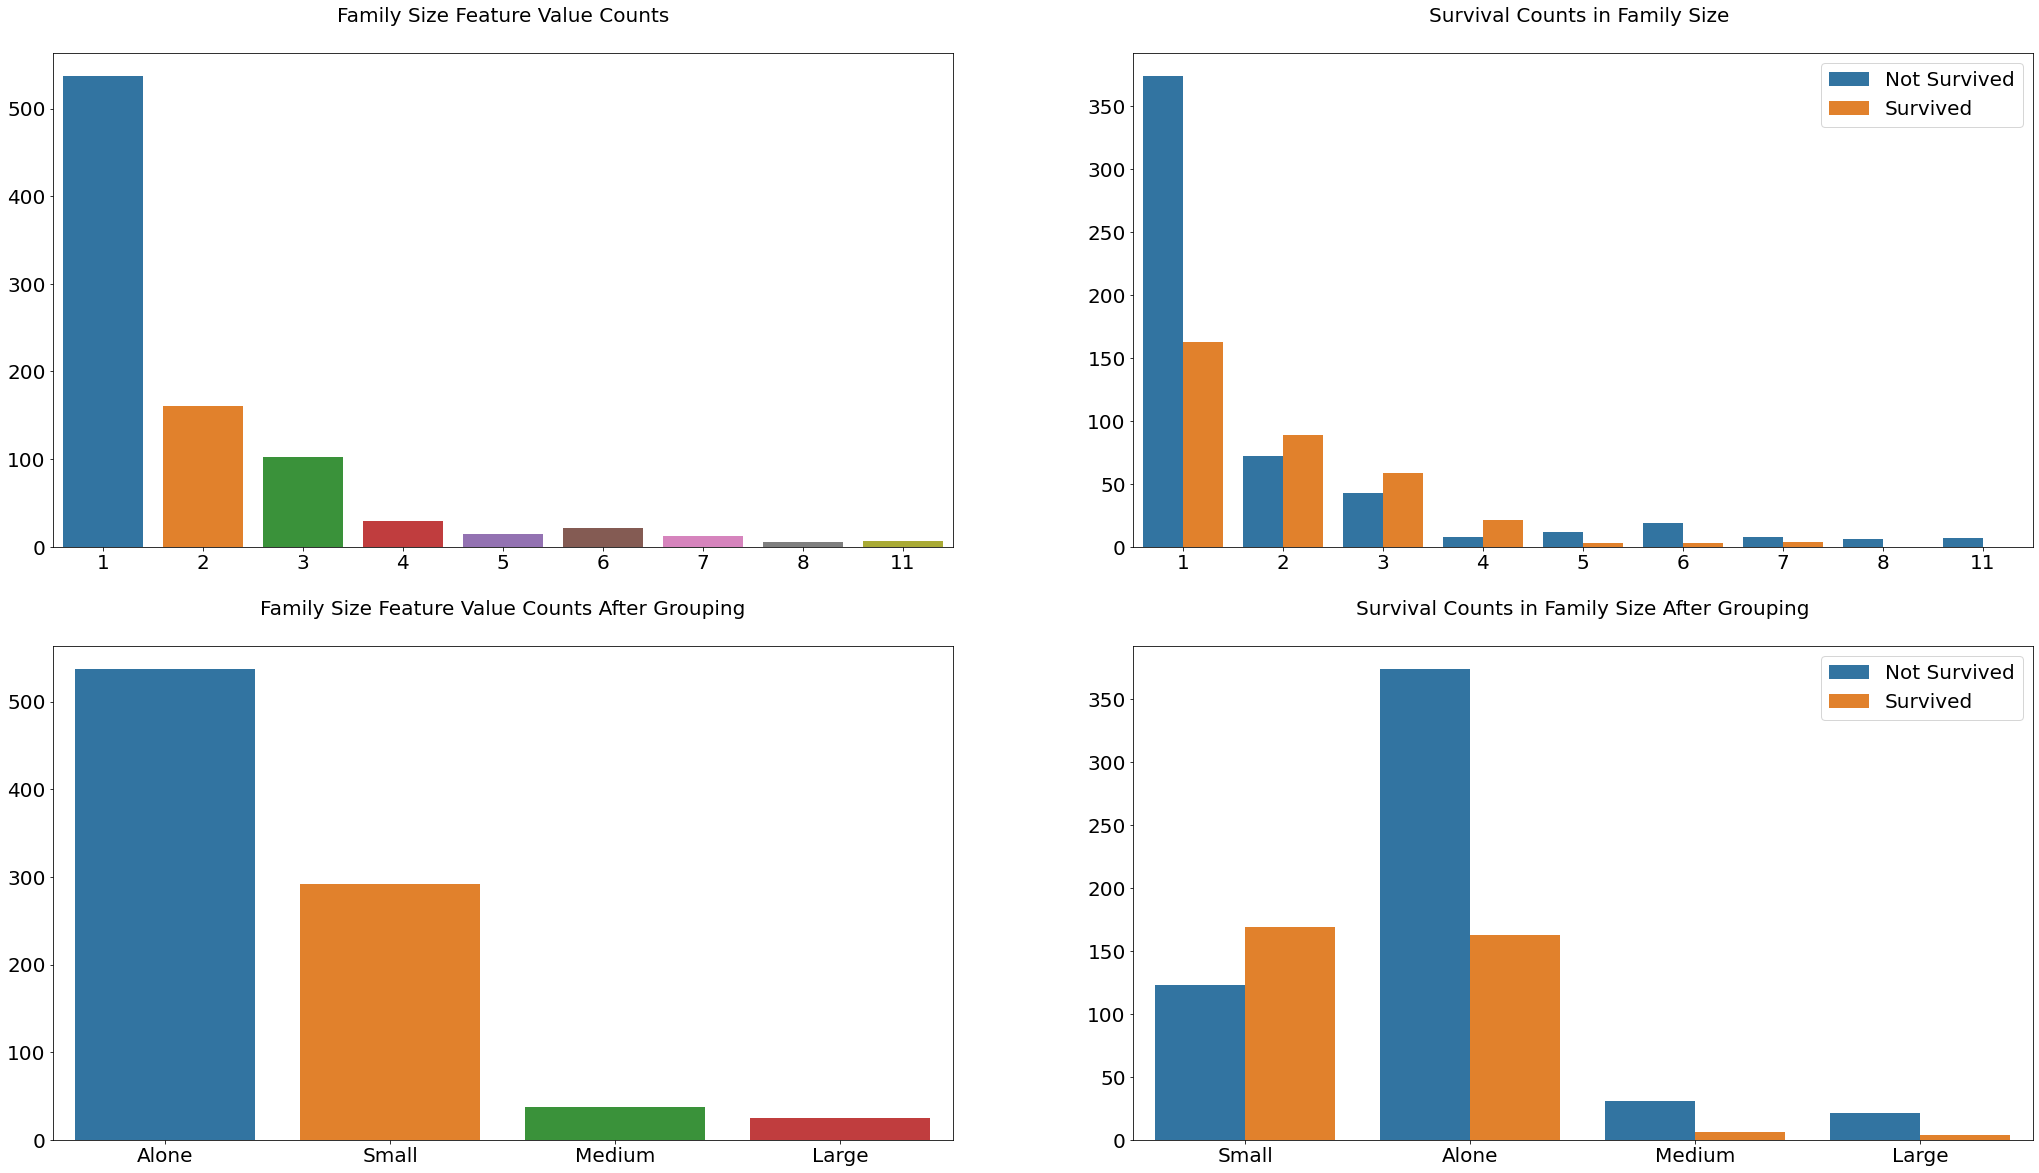

In [37]:
fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=train_data['FamilySize'].value_counts().index, y=train_data['FamilySize'].value_counts().values, ax=axs[0][0])
sns.countplot(x='FamilySize', hue='Survived', data=train_data, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
train_data['FamilySize_Grouped'] = train_data['FamilySize'].map(family_map)

sns.barplot(x=train_data['FamilySize_Grouped'].value_counts().index, y=train_data['FamilySize_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='FamilySize_Grouped', hue='Survived', data=train_data, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

In [38]:
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
test_data['FamilySize_Grouped'] = test_data['FamilySize'].map(family_map)

In [39]:
train_data["Ticket_Frequency"] = train_data.groupby('Ticket')['Ticket'].transform('count')

In [40]:
test_data["Ticket_Frequency"] = test_data.groupby('Ticket')['Ticket'].transform('count')

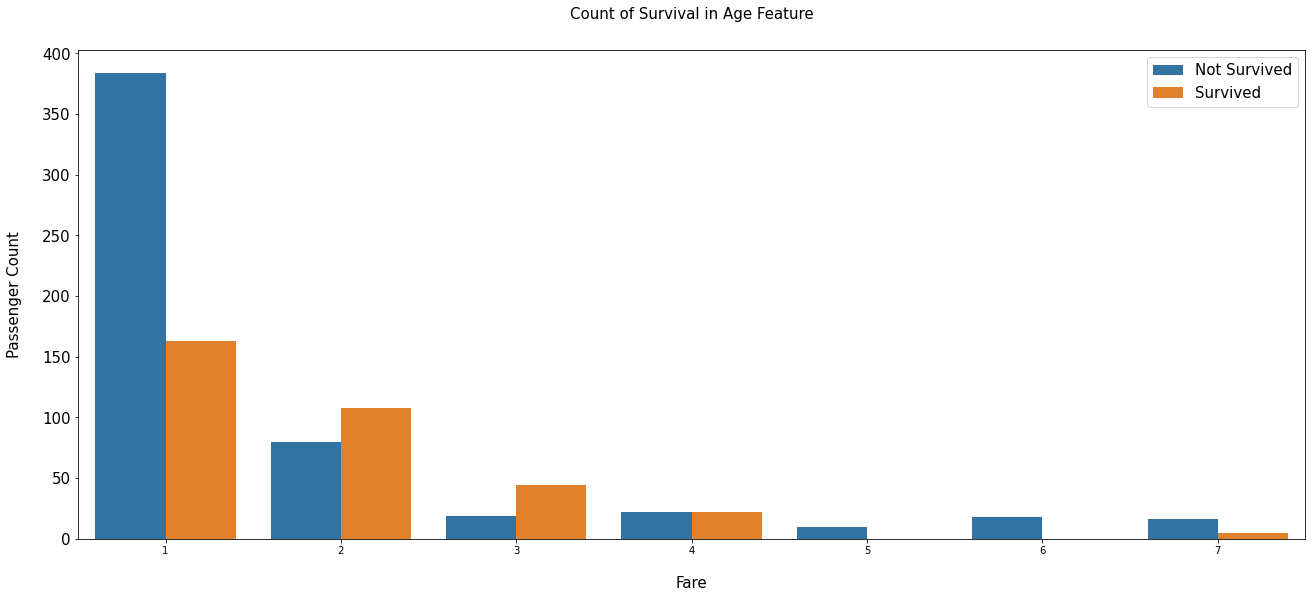

In [41]:
# train data Survival vs ticket frequency
fig,axis = plt.subplots(figsize = (22,9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=train_data)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()


In [42]:
train_data['Is_Married'] = 0
train_data['Is_Married'].loc[train_data['Title'] == 'Mrs'] = 1

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [43]:
test_data['Is_Married'] = 0
test_data['Is_Married'].loc[test_data['Title'] == 'Mrs'] = 1

In [44]:
import string
def extract_surname(data):
    
    families = []
    
    for i in range(len(data)):
        name = data.iloc[i]
        if '(' in name:
            name_no_bracket = name.split('(')[0] 
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        
        for c in string.punctuation:
            family = family.replace(c, '').strip()
            
        families.append(family)
            
    return families

train_data["Family"] = extract_surname(train_data["Name"])
test_data["Family"] = extract_surname(test_data["Name"])

<!DOCTYPE html>
<html>
<head>
<title>
</title>
<meta name="viewport" content="width=device-width, initial-scale=1">
</head>
<body>
<h1 style="color:DodgerBlue;">
some more feature</h1>
<ul style="color:DodgerBlue; list-style-type: square; padding: 10px; font-size:16px;">
    <li>Family Survival Rate : this will indicate survival rate of family(we club family using surname) </li>
    <li>Ticket Survival Rate : this will indicate survival rate of perticular tikcets </li>
</ul>
</body>
</html>

In [45]:
# Creating a list of families and tickets that are occuring in both training and test set
non_unique_families = [x for x in train_data["Family"].unique() if x in test_data["Family"].unique()]
non_unique_tickets = [x for x in train_data["Ticket"].unique() if x in test_data["Ticket"].unique()]

In [46]:
df_family_survival_rate = train_data.groupby("Family")["Survived","Family","FamilySize"].median()
df_ticket_survival_rate = train_data.groupby("Ticket")["Survived","Ticket", "Ticket_Frequency"].median()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [47]:
family_rates = {}
ticket_rates = {}

In [48]:
for i in range(len(df_family_survival_rate)):
    # Checking a family exists in both training and test set, and has members more than 1
    if df_family_survival_rate.index[i] in non_unique_families and df_family_survival_rate.iloc[i, 1] > 1:
        family_rates[df_family_survival_rate.index[i]] = df_family_survival_rate.iloc[i, 0]


for i in range(len(df_ticket_survival_rate)):
    
    # checking ticket avilable in both train and test set and has more than 1 member
    if df_ticket_survival_rate.index[i] in non_unique_tickets and df_ticket_survival_rate.iloc[i,1]>1 :
        ticket_rates[df_ticket_survival_rate.index[i]] = df_ticket_survival_rate.iloc[i,0]

In [49]:
mean_survival_rate = np.mean(train_data['Survived'])

# family survival rate 
train_family_survival_rate = []
train_family_survival_rate_NA = []
test_family_survival_rate = []
test_family_survival_rate_NA = []

for i in range(len(train_data)):
    if train_data["Family"][i] in family_rates :
        train_family_survival_rate.append(family_rates[train_data["Family"][i]])
        train_family_survival_rate_NA.append(1)
    else:
        train_family_survival_rate.append(mean_survival_rate)
        train_family_survival_rate_NA.append(0)
        
for i in range(len(test_data)):
    if test_data["Family"].iloc[i] in family_rates :
        test_family_survival_rate.append(family_rates[test_data["Family"].iloc[i]])
        test_family_survival_rate_NA.append(1)
    else:
        test_family_survival_rate.append(mean_survival_rate)
        test_family_survival_rate_NA.append(0)
        
train_data["Famiily_survival_rates"] = train_family_survival_rate
train_data["Famiily_survival_rates_NA"] = train_family_survival_rate_NA
test_data["Famiily_survival_rates"] = test_family_survival_rate
test_data["Famiily_survival_rates_NA"] = test_family_survival_rate_NA

In [50]:
# now we will do same for ticket_survival_rate

train_ticket_survival_rate = []
train_ticket_survival_rate_NA = []
test_ticket_survival_rate = []
test_ticket_survival_rate_NA = []

for i in range(len(train_data)):
    if train_data["Ticket"][i] in ticket_rates:
        train_ticket_survival_rate.append(ticket_rates[train_data["Ticket"][i]])
        train_ticket_survival_rate_NA.append(1)
    else:
        train_ticket_survival_rate.append(mean_survival_rate)
        train_ticket_survival_rate_NA.append(0)

for i in range(len(test_data)):
    if test_data["Ticket"].iloc[i] in ticket_rates:
        test_ticket_survival_rate.append(ticket_rates[test_data["Ticket"].iloc[i]])
        test_ticket_survival_rate_NA.append(1)
    else:
        test_ticket_survival_rate.append(mean_survival_rate)
        test_ticket_survival_rate_NA.append(0)

train_data["Ticket_survival_rates"] = train_ticket_survival_rate
train_data["Ticket_survival_rates_NA"] = train_ticket_survival_rate_NA

test_data["Ticket_survival_rates"] = test_ticket_survival_rate
test_data["Ticket_survival_rates_NA"] = test_ticket_survival_rate_NA

In [51]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,AgeBin,Title,FamilySize_Grouped,Ticket_Frequency,Is_Married,Family,Famiily_survival_rates,Famiily_survival_rates_NA,Ticket_survival_rates,Ticket_survival_rates_NA
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,"(20.0, 25.0]",Mr,Small,1,0,Braund,0.383838,0,0.383838,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,"(30.0, 40.0]",Mrs,Small,1,1,Cumings,1.000000,1,0.383838,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,"(25.0, 30.0]",Miss,Alone,1,0,Heikkinen,0.383838,0,0.383838,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,"(30.0, 40.0]",Mrs,Small,2,1,Futrelle,0.383838,0,0.383838,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,"(30.0, 40.0]",Mr,Alone,1,0,Allen,0.383838,0,0.383838,0


<!DOCTYPE html>
<html>
<head>
<title>
</title>
<meta name="viewport" content="width=device-width, initial-scale=1">
</head>
<body>
<h1 style="color:DodgerBlue;">
Feature Transformation</h1>
<ul style="color:DodgerBlue; list-style-type: square; padding: 10px; font-size:16px;">
    <li>Label Encoding Non-Numerical Features</li>
    <li>One-Hot Encoding the Categorical Features </li>
</ul>
</body>
</html> 


In [52]:
non_numeric_features = ["Embarked","Deck","Title","FamilySize_Grouped","Sex","AgeBin","FareBin"]

In [53]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [54]:
datasets = [train_data, test_data]
for dataset in datasets:
    for feature in non_numeric_features:
        dataset[feature] = LabelEncoder().fit_transform(dataset[feature])

In [55]:
# categorical features
cat_features = ['Pclass', 'Sex', 'Deck', 'Embarked', 'Title', 'FamilySize_Grouped']
encoded_features = []

In [56]:
for dataset in datasets:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(dataset[feature].values.reshape(-1,1)).toarray()
        n = dataset[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = dataset.index
        encoded_features.append(encoded_df)

In [57]:
train_data = pd.concat([train_data, *encoded_features[:6]], axis=1)
test_data = pd.concat([test_data, *encoded_features[6:]], axis=1)

In [58]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_3,Title_1,Title_2,Title_3,Title_4,Title_5,FamilySize_Grouped_1,FamilySize_Grouped_2,FamilySize_Grouped_3,FamilySize_Grouped_4
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [59]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                891 non-null    int64  
 1   Survived                   891 non-null    int64  
 2   Pclass                     891 non-null    int64  
 3   Name                       891 non-null    object 
 4   Sex                        891 non-null    int64  
 5   Age                        891 non-null    float64
 6   SibSp                      891 non-null    int64  
 7   Parch                      891 non-null    int64  
 8   Ticket                     891 non-null    object 
 9   Fare                       891 non-null    float64
 10  Embarked                   891 non-null    int64  
 11  Deck                       891 non-null    int64  
 12  FamilySize                 891 non-null    int64  
 13  IsAlone                    891 non-null    int64  

In [60]:
drop_cols = ["Deck","Embarked","Family","FamilySize","FamilySize_Grouped","Name","Parch","PassengerId",
             "Pclass","Sex","SibSp","Ticket","Title","Ticket_survival_rates","Famiily_survival_rates",
             "Ticket_survival_rates_NA","Famiily_survival_rates_NA","Age","Fare"]

In [61]:
test_data.drop(columns = drop_cols, inplace = True)
train_data.drop(columns = drop_cols,inplace = True)

In [62]:
train_data.head()

,Survived,IsAlone,FareBin,AgeBin,Ticket_Frequency,Is_Married,Pclass_1,Pclass_2,Pclass_3,Sex_1,...,Embarked_3,Title_1,Title_2,Title_3,Title_4,Title_5,FamilySize_Grouped_1,FamilySize_Grouped_2,FamilySize_Grouped_3,FamilySize_Grouped_4
0,0,0,0,1,1,0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,0,3,3,1,1,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,1,1,2,1,0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,0,3,3,2,1,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,1,1,3,1,0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [63]:
test_data.head()

,IsAlone,FareBin,AgeBin,Ticket_Frequency,Is_Married,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,...,Embarked_3,Title_1,Title_2,Title_3,Title_4,Title_5,FamilySize_Grouped_1,FamilySize_Grouped_2,FamilySize_Grouped_3,FamilySize_Grouped_4
0,1,0,3,1,0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0,0,4,1,1,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,1,4,1,0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1,1,2,1,0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,1,1,1,1,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


<!DOCTYPE html>
<html>
<head>
<title>
</title>
<meta name="viewport" content="width=device-width, initial-scale=1">
</head>
<body>
<h1 style="color:DodgerBlue;">
5 Model Creation</h1>
<ul style="color:DodgerBlue; list-style-type: square; padding: 10px; font-size:16px;">
    <li>Define X and Y</li>
    <li>Scale using Standard Scaler</li>
</body>
</html>

In [64]:
# let us Define X and Y first

X = train_data.iloc[:,1:]
Y = train_data["Survived"]

In [65]:
# let scale using standard scaler

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
test_data_scale = scaler.transform(test_data)

In [66]:
print('X_train shape: {}'.format(X_scale.shape))
print('y_train shape: {}'.format(Y.shape))
print('X_test shape: {}'.format(test_data_scale.shape))

X_train shape: (891, 26)
y_train shape: (891,)
X_test shape: (418, 26)


<!DOCTYPE html>
<html>
<head>
<title>
</title>
<meta name="viewport" content="width=device-width, initial-scale=1">
</head>
<body>
<h1 style="color:DodgerBlue;">
Logistic Model</h1>
<ul style="color:DodgerBlue; list-style-type: square; padding: 10px; font-size:16px;">
    <li>Model Creation</li>
    <li>Hyper Parameter tuning</li>
<ul>
</body>
</html>

In [67]:
# Logistic Model 
from sklearn.linear_model import LogisticRegression

In [68]:
Logistic_Reg_Model = LogisticRegression()

In [69]:
Logistic_Reg_Model.fit(X_scale,Y)

LogisticRegression()

In [70]:
y_test_pred = Logistic_Reg_Model.predict(test_data_scale)

In [71]:
# Hyper Parameter tunning for Logistic Regression
from sklearn.model_selection import GridSearchCV

# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [72]:
logistic = LogisticRegression()
clf = GridSearchCV(logistic,                  
                   param_grid = parameters,   
                   scoring='accuracy',
                   cv=10)

In [73]:
clf.fit(X_scale,Y)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [74]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.8294257178526842


In [75]:
best_logistic_model = LogisticRegression(C = 0.1, 
                            penalty = 'l1', 
                            solver = 'liblinear')

In [76]:
best_logistic_model.fit(X_scale,Y)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [77]:
y_test_pred = best_logistic_model.predict(test_data_scale)

In [78]:
#submission --------- Submission.csv File
submission_frame = pd.read_csv("../input/titanic/gender_submission.csv")
submission_frame["Survived"] = y_test_pred
submission_frame.to_csv("submission.csv",index = False)